#### Załadowanie danych i pakietów

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import seaborn as sns
import matplotlib.ticker as plticker

Zbiór danych pochodzi z https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/2019-Oct.csv')

#### Typy danych i nazwy kolumn

In [ ]:
print(df.head(1))

df.info(show_counts=True)

                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   

  category_code     brand  price    user_id  \
0           NaN  shiseido  35.79  541312140   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   event_time     42448764 non-null  object 
 1   event_type     42448764 non-null  object 
 2   product_id     42448764 non-null  int64  
 3   category_id    42448764 non-null  int64  
 4   category_code  28933155 non-null  object 
 5   brand          36331684 non-null  object 
 6   price          42448764 non-null  float64
 7   user_id        42448764 non-null  int64  
 8   user_session   42448762 non-null  object 
dtypes: float64(1), int64(3), object(5)
m

In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


#### Podsumowanie cen

In [ ]:
pd.set_option('float_format', '{:.2f}'.format)

print(df['price'].describe())
print(df["price"].min())

count   42448764.00
mean         290.32
std          358.27
min            0.00
25%           65.98
50%          162.93
75%          358.57
max         2574.07
Name: price, dtype: float64
0.0


#### Jaki procent zdarzeń stanowi dany typ wydarzenia: `purchase`, `view`, `cart`?

In [ ]:
def percent_of_events(event_type):
    df_events = df[["event_type"]]
    no_of_events = len(df_events["event_type"])
    df_events = df_events.loc[(df["event_type"] == event_type)]
    no_of_events_type = df_events.count()["event_type"]

    return print(f'{event_type} miał miejsce {no_of_events_type} razy. {round(no_of_events_type/no_of_events*100, 2)}% wszystkich zdarzeń stanowi {event_type}')

percent_of_events("purchase")

purchase miał miejsce 742849 razy. 1.75% wszystkich zdarzeń stanowi purchase


In [ ]:
visitors = df['user_id'].nunique()
print(f"Liczba unikalnych odwiedzających : {visitors}")

sessions = df['user_session'].nunique()
print(f"Liczba unikalnych sesji: {sessions}")

Liczba unikalnych odwiedzających : 3022290
Liczba unikalnych sesji: 9244421


In [ ]:
print(f"Liczba uniklanych produktów: {df['product_id'].nunique()}")

Liczba uniklanych produktów: 166794


#### W jaki dzień sprzedano najwięcej produktów?

In [ ]:
purchase_date = df.loc[:,['event_time', 'user_id', 'event_type']].copy()
purchase_date = purchase_date.loc[(purchase_date['event_type'] == 'purchase')]
purchase_date['event_time'] = purchase_date['event_time'].apply(lambda s: str(s)[0:10])
purchase_date

,event_time,user_id,event_type
162,2019-10-01,543272936,purchase
308,2019-10-01,551377651,purchase
379,2019-10-01,514591159,purchase
442,2019-10-01,555332717,purchase
574,2019-10-01,524601178,purchase
...,...,...,...
42448148,2019-10-31,516604399,purchase
42448173,2019-10-31,514622109,purchase
42448271,2019-10-31,512717356,purchase
42448362,2019-10-31,533892594,purchase


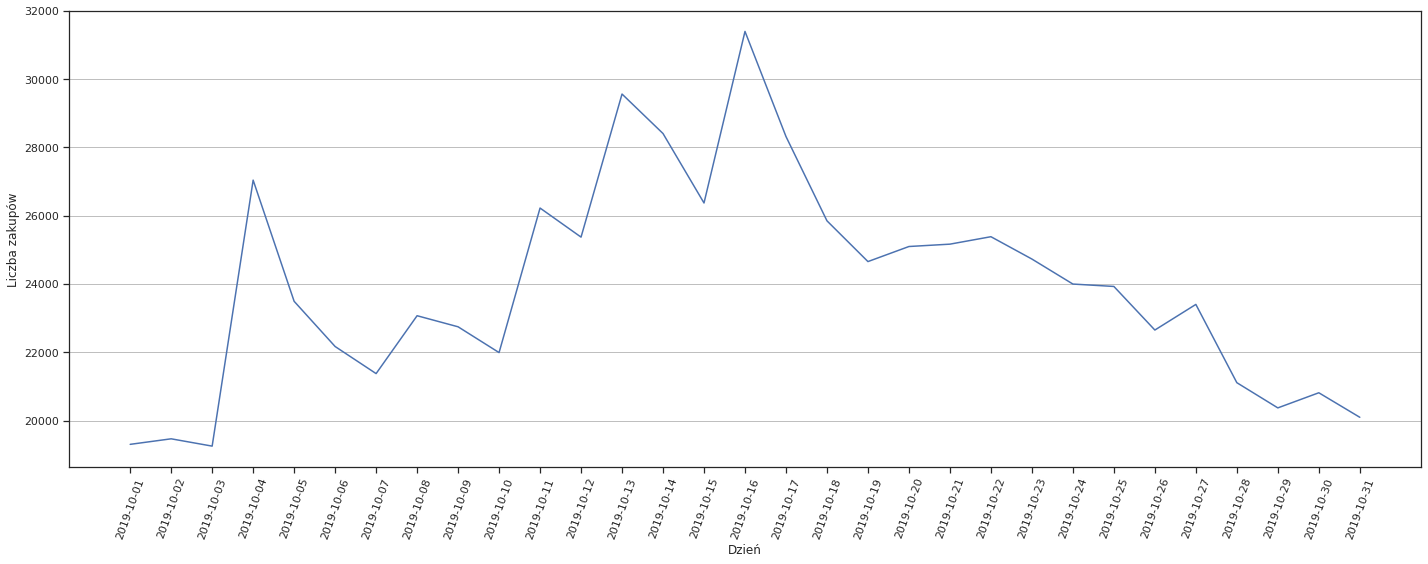

In [ ]:
daily_purchases = purchase_date.groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)
daily_purchases["purchase_count"] = daily_purchases["count"]
daily_purchases.drop("count", axis=1, inplace=True)

sns.set(rc={'figure.figsize':(20, 8)})
sns.set_style("ticks")
lineplot_days = sns.lineplot(x='event_time', y='purchase_count', data=daily_purchases)
lineplot_days.set(xlabel='Dzień', ylabel='Liczba zakupów')
plt.grid(axis='y', color="grey", linewidth=0.5)
for item in lineplot_days.get_xticklabels():
    item.set_rotation(70)

plt.tight_layout()
plt.savefig("daily_purchases.png")
plt.show()

In [ ]:
visit_date = df.loc[:,['event_time', 'user_session']].copy()
visit_date['event_time'] = visit_date['event_time'].apply(lambda s: str(s)[0:10])
daily_purchases["sessions_count"] = visit_date.groupby(['event_time'])['user_session'].agg(['nunique']).sort_values(by=['event_time'], ascending=True)
daily_purchases.reset_index(inplace=True)
daily_purchases

,event_time,purchase_count,sessions_count
0,2019-10-01,19307,268737
1,2019-10-02,19469,261252
2,2019-10-03,19255,241086
3,2019-10-04,27041,300651
4,2019-10-05,23494,276914
5,2019-10-06,22171,273034
6,2019-10-07,21378,263437
7,2019-10-08,23072,308348
8,2019-10-09,22748,301219
9,2019-10-10,21993,295142


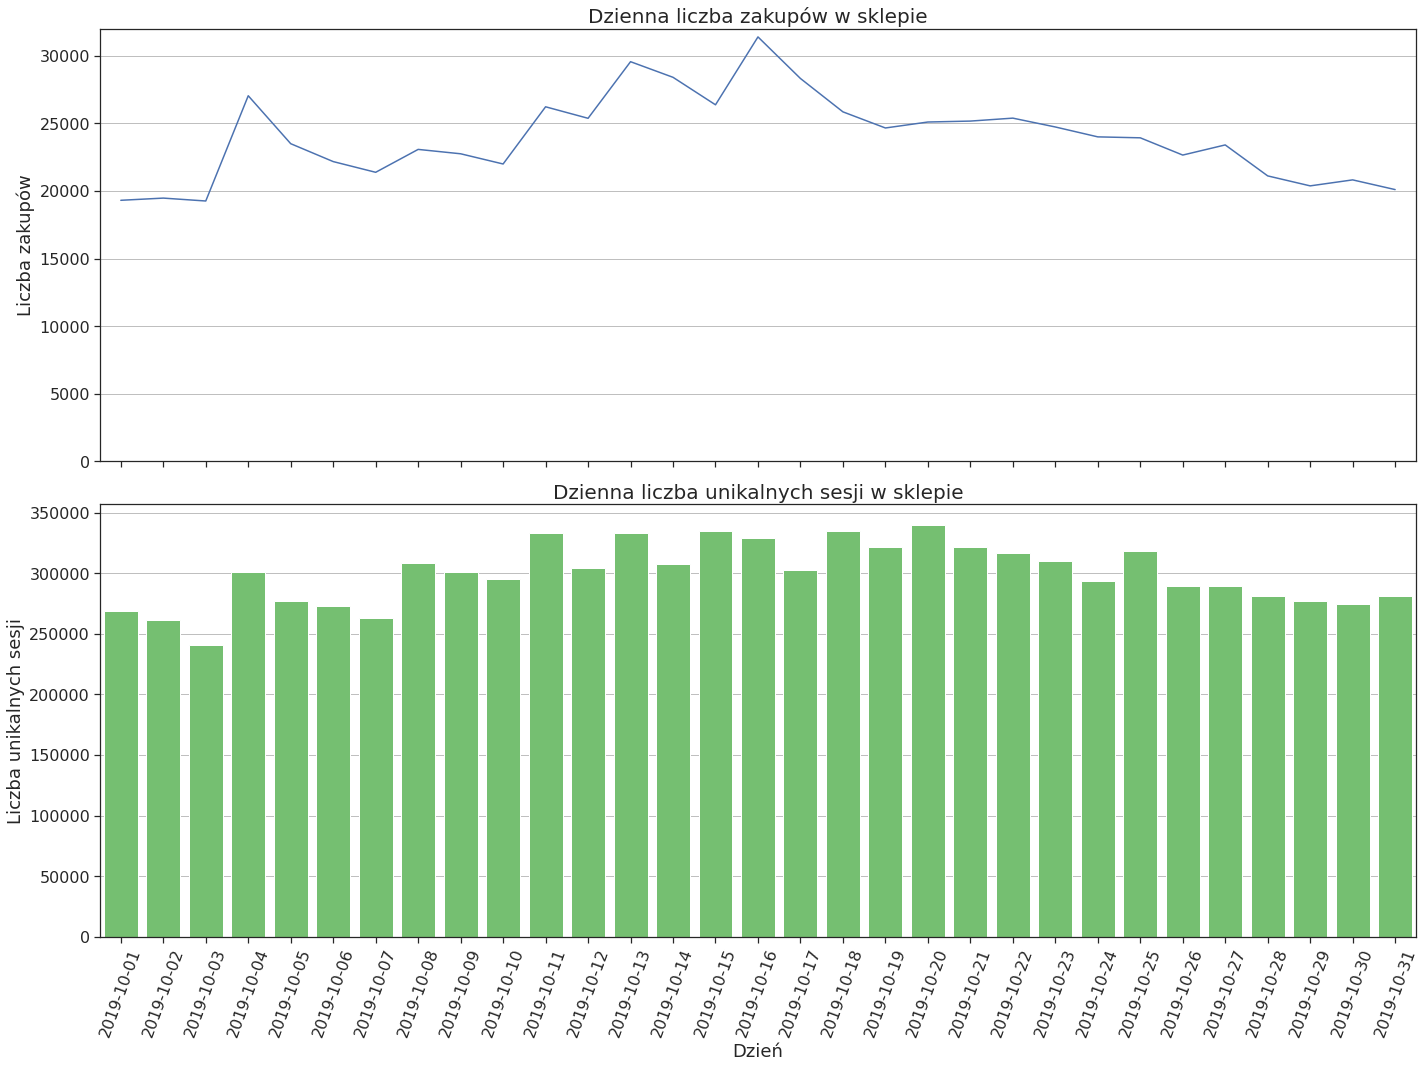

In [ ]:
sns.set(rc={'figure.figsize':(20, 8)})
sns.set_style("ticks")
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20, 15))
axes[0].set_title('Dzienna liczba zakupów w sklepie', fontsize=20)
lineplot_days = sns.lineplot(ax=axes[0], x='event_time', y='purchase_count', data=daily_purchases)
# lineplot_days.set(xlabel='Dzień', ylabel='Liczba zakupów')
lineplot_days.set(ylim=(0, 32000))
lineplot_days.grid(axis='y', color="grey", linewidth=0.5)

axes[1].set_title('Dzienna liczba unikalnych sesji w sklepie', fontsize=20)
barplot_days = sns.barplot(ax=axes[1], x='event_time', y='sessions_count', data=daily_purchases, color='#6acc64')
# barplot_days.set(xlabel='Dzień', ylabel='Liczba unikalnych sesji')
barplot_days.grid(axis='y', color="grey", linewidth=0.5)
for item in barplot_days.get_xticklabels():
    item.set_rotation(70)

axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[0].set_xlabel('Dzień', fontsize=18)
axes[0].set_ylabel('Liczba zakupów', fontsize=18)

axes[1].tick_params(axis='both', which='major', labelsize=16)
axes[1].set_xlabel('Dzień', fontsize=18)
axes[1].set_ylabel('Liczba unikalnych sesji', fontsize=18)

plt.tight_layout()
plt.savefig("combined_purchases.png")
plt.show()

In [ ]:
daily_purchases.corr()

,purchase_count,sessions_count
purchase_count,1.00,0.79
sessions_count,0.79,1.00


#### Godzina zakupu

In [ ]:
purchase_time = df.loc[:,['event_time', 'user_id', 'event_type']]
purchase_time = purchase_time.loc[(purchase_time['event_type'] == 'purchase')]
purchase_time['event_time'] = pd.to_datetime(purchase_time.event_time)
purchase_time['hour'] = purchase_time['event_time'].map(lambda x: x.hour)
purchase_time.head()

,event_time,user_id,event_type,hour
162,2019-10-01 00:02:14+00:00,543272936,purchase,0
308,2019-10-01 00:04:37+00:00,551377651,purchase,0
379,2019-10-01 00:06:02+00:00,514591159,purchase,0
442,2019-10-01 00:07:07+00:00,555332717,purchase,0
574,2019-10-01 00:09:26+00:00,524601178,purchase,0


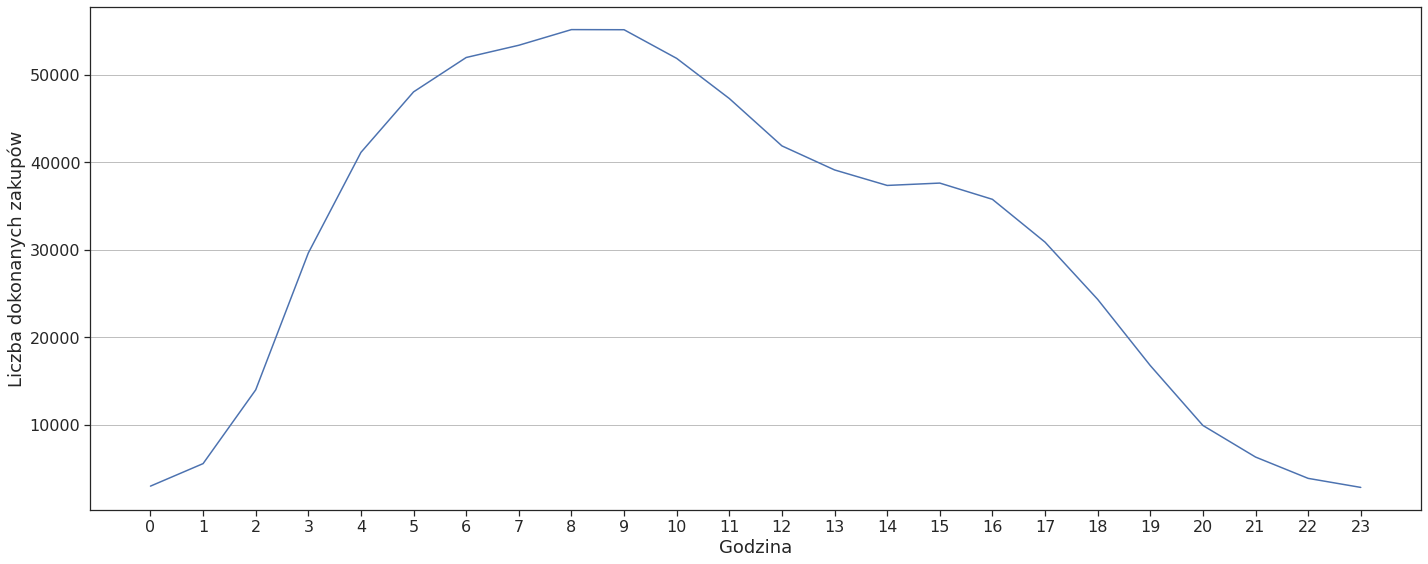

In [ ]:
hourly_purchases = purchase_time.groupby(['hour'])['user_id'].agg(['count']).sort_values(by=['hour'], ascending=True)

fig, axes = plt.subplots(figsize=(20, 8))
lineplot_hours = sns.lineplot(x='hour', y='count', data=hourly_purchases)
axes.set_xlabel('Godzina', fontsize=18)
axes.set_ylabel('Liczba dokonanych zakupów', fontsize=18)
axes.tick_params(axis='both', which='major', labelsize=16)
plt.grid(axis='y', color="grey", linewidth=0.5)
plt.tight_layout()
plt.xticks([1 * i for i in range(0,24)])
plt.savefig("hours_purchases.png")
plt.show()

Duży udział zakupów w godzinach porannych (według czasu UTC) może sugerować, że sklep nie znajduje się w Europie.

### Sprzedaż ze względu na markę

In [ ]:
unique_brands = df['brand'].nunique()
print(f'Liczba uniklanych marek w zbiorze to {unique_brands}')

Liczba uniklanych marek w zbiorze to 3444


#### Co sprzedaje się częściej produkt z marką, czy bez marki?

In [ ]:
brands_purchased = df.loc[(df['event_type'] == 'purchase')]
off_brand = brands_purchased['brand'].isnull().sum()

print(f'{round(off_brand/len(df.loc[(df["event_type"] == "purchase")])*100, 2)}% zakupionych produktów stanowią produkty bez marki')

7.85% zakupionych produktów stanowią produkty bez marki


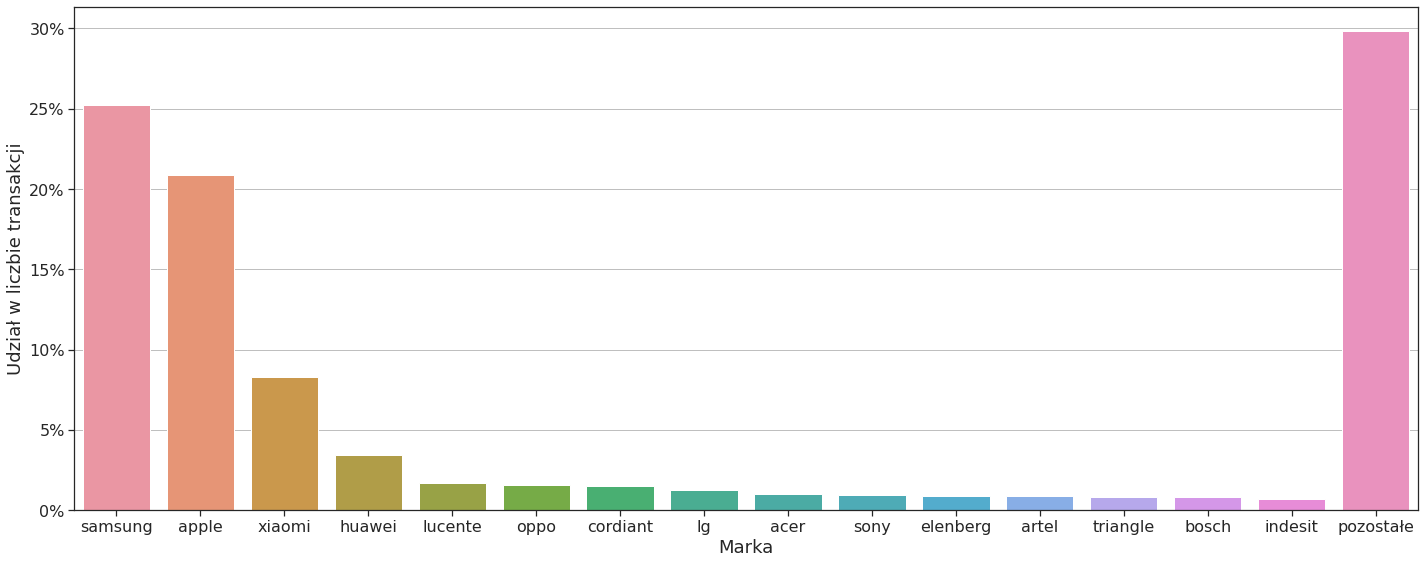

In [ ]:
brands_y = brands_purchased['brand'].value_counts()
brands_y_top = brands_y.head(15)

if len(brands_y) > 15:
    brands_y_top['pozostałe'.format(len(brands_y) - 15)] = sum(brands_y[15:])

brands_y_top = pd.DataFrame(brands_y_top)
brands_y_top.reset_index(inplace=True)
brands_y_top.columns = ['brand', 'count']

fig, axes = plt.subplots(figsize=(20, 8))
brands_barplot = sns.barplot(x='brand', y='count', data=brands_y_top)
axes.set_xlabel('Marka', fontsize=18)
axes.set_ylabel('Udział w liczbie transakcji', fontsize=18)
axes.tick_params(axis='both', which='major', labelsize=16)
axes.set_yticks([x*34227.2 for x in range(7)])
plt.grid(axis='y', color="grey", linewidth=0.5)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100/sum(brands_y)) for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.savefig("brand_sales.png")
plt.show()

In [ ]:
sum(brands_y)

684544

Ponad połowę zakupionych produktów stanowią produkty trzech marek.

### Struktura `event_type`

In [ ]:
event_types = df['event_type'].unique()
print(f'Możliwe wartości event_type to: {event_types}')

Możliwe wartości event_type to: ['view' 'purchase' 'cart']


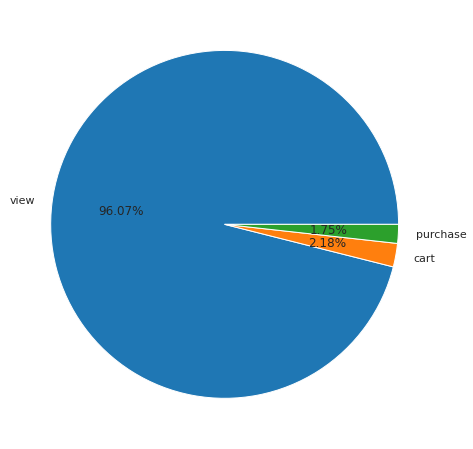

In [ ]:
event_types_share = df.loc[:,['event_type']]
event_types_share = event_types_share['event_type'].value_counts()

colors = sns.color_palette('tab10')[0:3]
plt.pie(event_types_share, labels=['view', 'cart', 'purchase'], colors=colors, autopct = '%.2f%%')
plt.show()

### Podział ze względu na kategorie produktów
#### Podział kategorii ze względu na liczbę zdarzeń

 Liczba kategorii w zbiorze to 126


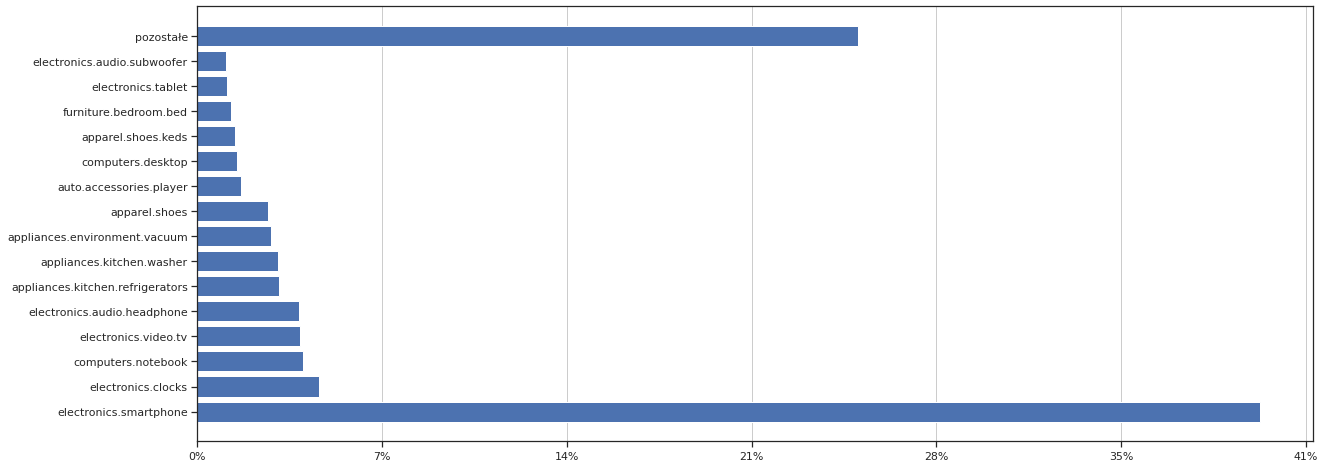

In [ ]:
categories = df.loc[:,['category_code']]
categories_y = categories['category_code'].value_counts()
categories_count = categories['category_code'].nunique()
print(f' Liczba kategorii w zbiorze to {categories_count}')

categories_y_top = categories_y.head(15)

if len(categories_y) > 15:
    categories_y_top['pozostałe'.format(len(categories_y) - 15)] = sum(categories_y[15:])
    
kategorie_x = pd.Series(categories_y_top.index.values)

plt.barh(kategorie_x, categories_y_top)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100/sum(categories_y)) for x in plt.gca().get_xticks()])
plt.grid(axis = 'x')
plt.show()

Udział sprzedanych produktów bez kategorii

In [ ]:
off_category = df.loc[(df['event_type'] == 'purchase')]
off_category = off_category['category_code'].isnull().sum()

print(f'{round(off_category/len(df.loc[(df["event_type"] == "purchase")])*100, 2)}% zakupionych produktów stanowią produkty bez kategorii')

23.35% zakupionych produktów stanowią produkty bez kategorii


#### Podział kategorii ze względu na sprzedaż

[     0.   28471.2  56942.4  85413.6 113884.8 142356.  170827.2 199298.4
 227769.6 256240.8 284712.  313183.2 341654.4 370125.6]


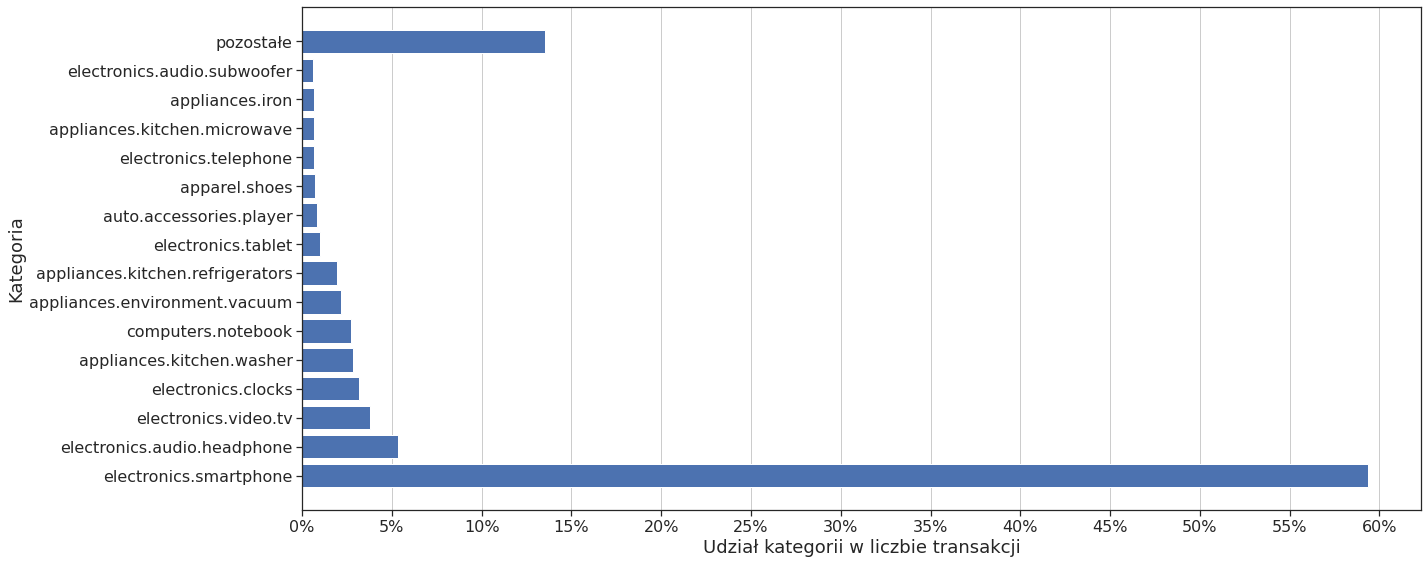

In [ ]:
categories_events = df.loc[:,['category_code','event_type']]
categories_sales = categories_events.loc[(categories_events['event_type'] == 'purchase')]

categories_sales = categories_sales['category_code'].value_counts()
categories_sales_top = categories_sales.head(15)

if len(categories_sales) > 15:
    categories_sales_top['pozostałe'.format(len(categories_sales) - 15)] = sum(categories_sales[15:])
  
categories_sales_x = pd.Series(categories_sales_top.index.values)
fig, axes = plt.subplots(figsize=(20, 8))
axes.set_xlabel('Udział kategorii w liczbie transakcji', fontsize=18)
axes.set_ylabel('Kategoria', fontsize=18)
axes.tick_params(axis='both', which='major', labelsize=16)
axes.set_xticks([x*28471.2 for x in range(14)])
plt.barh(categories_sales_x, categories_sales_top)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100/sum(categories_sales)) for x in plt.gca().get_xticks()])
plt.grid(axis='x')
print(axes.get_xticks())
plt.tight_layout()
plt.savefig("category_sales.png")
plt.show()

In [ ]:
sum(categories_sales)

569424

Pewne kategorie produktów posiadają większą ilość interakcji, ale są rzadziej kupowane, np. buty. Natomiast smartfony są najczęściej kupowany produktem w sklepie, mimo stosunkowo mniejszego udziału wśród interakcji. Może to wynikać z faktu, że cześć smartfonów kupowana jest bez dodawania do koszyka.

### Przykładowy klient

In [ ]:
user = df.sample(1)
user = int(user['user_id'])

client = df.loc[(df['user_id'] == user)]
pd.set_option('display.max_rows',500)
client

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
16639642,2019-10-13 11:30:14 UTC,view,1005031,2053013555631882655,electronics.smartphone,xiaomi,197.95,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0
16641156,2019-10-13 11:31:11 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,230.74,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0
16641386,2019-10-13 11:31:21 UTC,view,1005159,2053013555631882655,electronics.smartphone,xiaomi,230.79,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0
16641708,2019-10-13 11:31:33 UTC,view,1005102,2053013555631882655,electronics.smartphone,xiaomi,433.67,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0
16642804,2019-10-13 11:32:16 UTC,view,1004794,2053013555631882655,electronics.smartphone,xiaomi,228.52,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0
16644178,2019-10-13 11:33:09 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,1003.85,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0
16645431,2019-10-13 11:33:55 UTC,view,1004870,2053013555631882655,electronics.smartphone,samsung,285.40,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0
16646490,2019-10-13 11:34:36 UTC,view,1004836,2053013555631882655,electronics.smartphone,samsung,229.99,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0
16650696,2019-10-13 11:37:19 UTC,view,1004768,2053013555631882655,electronics.smartphone,samsung,250.84,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0
16650848,2019-10-13 11:37:25 UTC,view,1004659,2053013555631882655,electronics.smartphone,samsung,729.75,538319915,503ebbdf-3b77-49e4-8ba0-a838c0eb9dd0


Sprawdzenie losowych kategorii produktów -- czy jakaś kategoria ma taki sam `category_id`, ale różne `category_code`.

In [ ]:
category_id_check = df.sample(1)
category_id_check = int(category_id_check['category_id'])

category_check = df.loc[(df['category_id'] == category_id_check)]
pd.set_option('display.max_rows',500)
print(category_check["category_code"].unique())
category_check

['electronics.smartphone']


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2019-10-01 00:00:11 UTC,view,1005011,2053013555631882655,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
19,2019-10-01 00:00:19 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
20,2019-10-01 00:00:20 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f
...,...,...,...,...,...,...,...,...,...
42448744,2019-10-31 23:59:53 UTC,view,1004708,2053013555631882655,electronics.smartphone,huawei,151.99,566031393,8fbc7d60-6ae5-41c9-985c-cee9c52ab9ae
42448746,2019-10-31 23:59:54 UTC,view,1002786,2053013555631882655,electronics.smartphone,NaN,391.26,512789086,cc782b99-88ab-4573-8311-c62e1d447757
42448751,2019-10-31 23:59:56 UTC,view,1005008,2053013555631882655,electronics.smartphone,xiaomi,94.46,557202408,2169c430-9acc-4db8-8061-ac70ff0c66ea
42448752,2019-10-31 23:59:56 UTC,view,1003936,2053013555631882655,electronics.smartphone,xiaomi,437.33,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
